In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt

from umap import UMAP
from sklearn.decomposition import PCA

c:\Users\timo\Repositories\geneGNN\.pixi\envs\default\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
adata_og = ad.read_h5ad("data/adata_rosmap_v3_top1000_s3_k30_drop_nout.h5ad")

In [4]:
adata = ad.read_h5ad("out/for_umap/combined_noint.h5ad")
adata.obs = adata_og[adata.uns["mask"]].obs.copy()
del adata_og

In [5]:
adata.obs["Label"] = adata.obs["Label"].map({
    "AD": "AD",
    "CT": "Healthy",
})   

In [71]:
adata.obs["Celltype"] = adata.obs["Supertype"].map({
    "Astrocytes": "Astrocytes",
    "Excitatory_neurons_set2": "Excitatory neurons",
    "Excitatory_neurons_set3": "Excitatory neurons",
    "Excitatory_neurons_set1": "Excitatory neurons",
    "Immune_cells": "Immune cells",
    "Inhibitory_neurons": "Inhibitory neurons",
    "Oligodendrocytes": "Oligodendrocytes",
    "OPCs": "OPCs",
    "Vasculature_cells": "Vasculature cells",
}) 

In [8]:
adata.obsm["X_pca"] = PCA(n_components=50).fit_transform(adata.X)
adata.obsm["H_pca"] = PCA(n_components=50).fit_transform(adata.obsm["h_2_f4"])
adata.obsm["H_gat_pca"] = PCA(n_components=50).fit_transform(adata.obsm["h_2_f4_gat"])

In [73]:
n_down = 200000
mask_down = np.random.choice(adata.shape[0], n_down, replace=False)

adata_ds = adata[mask_down].copy()

In [74]:
x_umap = UMAP(n_components=2, verbose=True).fit_transform(adata_ds.obsm["X_pca"])

UMAP( verbose=True)
Fri Jan 17 18:55:14 2025 Construct fuzzy simplicial set
Fri Jan 17 18:55:14 2025 Finding Nearest Neighbors
Fri Jan 17 18:55:14 2025 Building RP forest with 27 trees
Fri Jan 17 18:55:14 2025 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
	 5  /  18
	Stopping threshold met -- exiting after 5 iterations
Fri Jan 17 18:55:17 2025 Finished Nearest Neighbor Search
Fri Jan 17 18:55:17 2025 Construct embedding


Epochs completed:   2%| ▏          4/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  12%| █▏         24/200 [00:01]

	completed  20  /  200 epochs


Epochs completed:  22%| ██▏        44/200 [00:02]

	completed  40  /  200 epochs


Epochs completed:  32%| ███▎       65/200 [00:03]

	completed  60  /  200 epochs


Epochs completed:  42%| ████▏      83/200 [00:04]

	completed  80  /  200 epochs


Epochs completed:  52%| █████▏     103/200 [00:05]

	completed  100  /  200 epochs


Epochs completed:  62%| ██████▏    124/200 [00:06]

	completed  120  /  200 epochs


Epochs completed:  71%| ███████    142/200 [00:07]

	completed  140  /  200 epochs


Epochs completed:  82%| ████████▏  164/200 [00:09]

	completed  160  /  200 epochs


Epochs completed:  92%| █████████▏ 184/200 [00:10]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:11]


Fri Jan 17 18:56:18 2025 Finished embedding


In [75]:
h_umap = UMAP(n_components=2, verbose=True).fit_transform(adata_ds.obsm["H_pca"])

UMAP( verbose=True)
Fri Jan 17 18:56:19 2025 Construct fuzzy simplicial set
Fri Jan 17 18:56:19 2025 Finding Nearest Neighbors
Fri Jan 17 18:56:19 2025 Building RP forest with 27 trees
Fri Jan 17 18:56:19 2025 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
	 5  /  18
	 6  /  18
	Stopping threshold met -- exiting after 6 iterations
Fri Jan 17 18:56:22 2025 Finished Nearest Neighbor Search
Fri Jan 17 18:56:22 2025 Construct embedding


Epochs completed:   2%| ▏          4/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  11%| █          22/200 [00:01]

	completed  20  /  200 epochs


Epochs completed:  22%| ██▏        44/200 [00:02]

	completed  40  /  200 epochs


Epochs completed:  32%| ███▏       64/200 [00:03]

	completed  60  /  200 epochs


Epochs completed:  42%| ████▏      84/200 [00:04]

	completed  80  /  200 epochs


Epochs completed:  52%| █████▏     103/200 [00:06]

	completed  100  /  200 epochs


Epochs completed:  62%| ██████▏    124/200 [00:07]

	completed  120  /  200 epochs


Epochs completed:  71%| ███████    142/200 [00:08]

	completed  140  /  200 epochs


Epochs completed:  82%| ████████▏  164/200 [00:09]

	completed  160  /  200 epochs


Epochs completed:  92%| █████████▎ 185/200 [00:11]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:11]


Fri Jan 17 18:57:24 2025 Finished embedding


In [76]:
h_gat_umap = UMAP(n_components=2, verbose=True, n_neighbors=200).fit_transform(adata_ds.obsm["H_gat_pca"])

UMAP(n_neighbors=100, verbose=True)
Fri Jan 17 18:57:24 2025 Construct fuzzy simplicial set
Fri Jan 17 18:57:24 2025 Finding Nearest Neighbors
Fri Jan 17 18:57:24 2025 Building RP forest with 27 trees
Fri Jan 17 18:57:24 2025 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	Stopping threshold met -- exiting after 2 iterations
Fri Jan 17 18:58:54 2025 Finished Nearest Neighbor Search
Fri Jan 17 18:58:58 2025 Construct embedding


Epochs completed:   2%| ▏          3/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  12%| █▏         23/200 [00:01]

	completed  20  /  200 epochs


Epochs completed:  22%| ██▏        43/200 [00:03]

	completed  40  /  200 epochs


Epochs completed:  32%| ███▏       63/200 [00:05]

	completed  60  /  200 epochs


Epochs completed:  40%| ████       81/200 [00:06]

	completed  80  /  200 epochs


Epochs completed:  52%| █████▏     103/200 [00:08]

	completed  100  /  200 epochs


Epochs completed:  62%| ██████▏    123/200 [00:10]

	completed  120  /  200 epochs


Epochs completed:  70%| ███████    141/200 [00:12]

	completed  140  /  200 epochs


Epochs completed:  82%| ████████▏  163/200 [00:14]

	completed  160  /  200 epochs


Epochs completed:  90%| █████████  181/200 [00:15]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:17]


Fri Jan 17 19:01:24 2025 Finished embedding


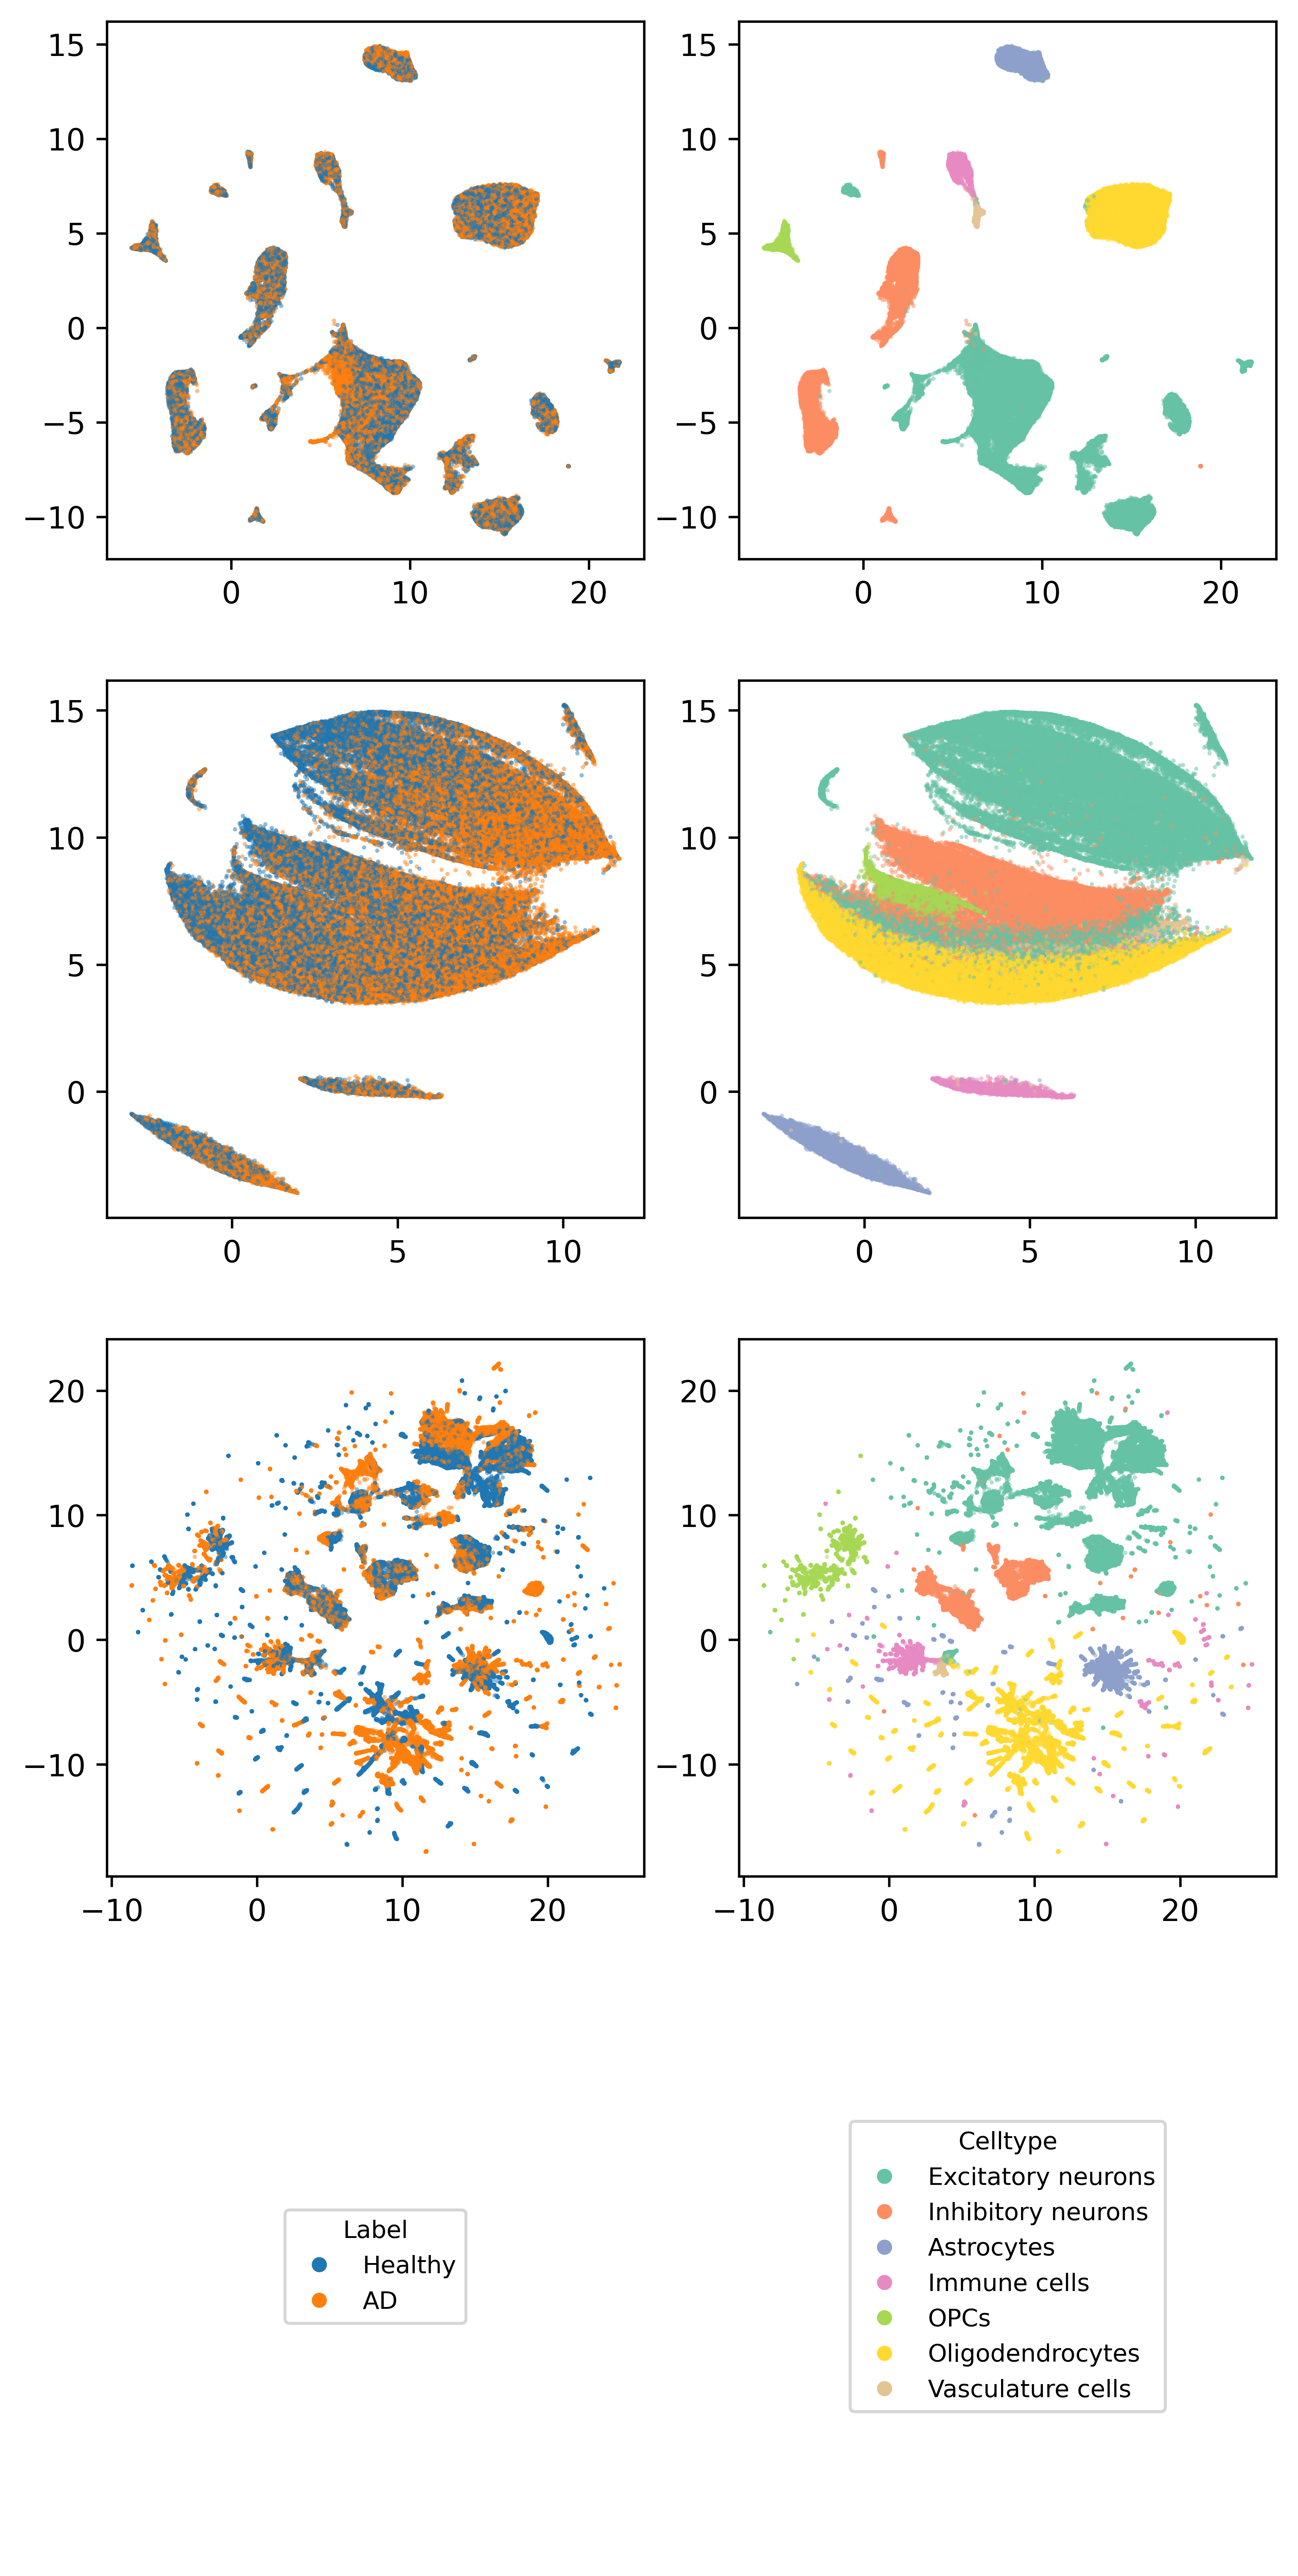

In [77]:
SIZE = 2

label_order = ["Healthy", "AD"]
celltype_order = ['Excitatory neurons', 'Inhibitory neurons', 'Astrocytes', 'Immune cells', 'OPCs', 'Oligodendrocytes', 'Vasculature cells']

label_palette = sns.color_palette("tab10", 2)
celltype_palette = sns.color_palette("Set2", 7)

fig, axs = plt.subplots(4, 2, figsize = (6, 12), dpi=600)  # sharex=True, sharey=True)

for i, emb in enumerate([x_umap, h_umap, h_gat_umap]):
    for j, color in enumerate(["Label", "Celltype"]):

        palette = "tab10" if color == "Label" else "Set2"
        hue_order = label_order if color == "Label" else celltype_order

        axs[i, j].set_box_aspect(1)

        sns.scatterplot(x=emb[:, 0], y=emb[:, 1], 
                        hue=adata_ds.obs[color], ax=axs[i, j], s=SIZE, 
                        legend=False, linewidth=0, palette=palette,
                        hue_order=hue_order, alpha=0.5)


# Just make a custom legend
from matplotlib.lines import Line2D

label_legend = [
    Line2D([0], [0], marker="o", color="w", label=label, markersize=SIZE, markerfacecolor=label_palette[i])
    for i, label in enumerate(label_order)
]
axs[3, 0].legend(handles=label_legend, markerscale=3, loc="center", ncol=1, title="Label", title_fontsize=8, fontsize=8)

ct_legend = [
    Line2D([0], [0], marker="o", color="w", label=celltype, markersize=SIZE, markerfacecolor=celltype_palette[i])
    for i, celltype in enumerate(celltype_order)
]
axs[3, 1].legend(handles=ct_legend, markerscale=3, loc="center", ncol=1, title="Celltype", title_fontsize=8, fontsize=8)

# turn the grid off here
axs[3, 0].grid(False)
axs[3, 1].grid(False)

# and the axes
axs[3, 0].axis("off")
axs[3, 1].axis("off")


plt.tight_layout()
plt.savefig("out/figures/cell_umap.png", dpi=600)